# 1. Antes de modificar el threshold

In [1]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import eegraph
import os


In [2]:
#1) Read EEG files and transform into NetworkX graphs with EEGRAPH
#============================================================================================================================================================================

def search(values, searchFor):
    for k in values:
        if (searchFor == k):
            return (values[k])

    
def search_key(values, searchFor):
    for key, value in values.items():
        if value[0] == searchFor:
            return key
          
    
def test_empty(graphs, conn_empty_values, conn):
    conn_empty_aux = [0] * len(conn_empty_values)
    for i in range(len(graphs)):
        if(nx.is_empty(graphs[i])):
            conn_empty_aux[conn] += 1
    
    conn_empty_values[conn] = conn_empty_values[conn] + conn_empty_aux[conn]
    print('Empty:',conn_empty_values,'\n')
    return conn_empty_values   
    
    
def modelate_with_different_connectivity(window_size, label, connectivity_number_total, G, conn_empty_values):
    total_graphs_class_0, total_graphs_class_1  = [], []
    for i in range(connectivity_number_total):
        conn = search_key(connectivity_measures, i)
        bands = search(connectivity_measures, conn)[1]
        
        # The threshold can be omited to use the default one
        graphs, _ = G.modelate(window_size = window_size, connectivity = conn, bands = bands, threshold = 0.9)  

        conn_empty_values = test_empty(graphs, conn_empty_values, i)
        
        if(int(label)):
            total_graphs_class_1 = total_graphs_class_1 + list(graphs.values())    
        
        else:
            total_graphs_class_0 = total_graphs_class_0 + list(graphs.values())
            

    return total_graphs_class_0, total_graphs_class_1, conn_empty_values


def open_data_directories(path, window_size_class_0, window_size_class_1, connectivity_number_total, exclude=[None]):
    conn_empty_values = [0] * connectivity_number_total
    graphs_class_0, graphs_class_1 = [], []
    class_files = os.listdir(path)
    for entry in class_files:
        eeg_files = os.listdir(path + '/' + entry)
        for eeg in eeg_files:
            eeg_path = (path + '/' + entry + '/' + eeg)
            print(eeg_path, entry)
            G = eegraph.Graph() 
            G.load_data(path= eeg_path, exclude = exclude)
            
            if(entry == '1'):     # Number 1 corresponds to "espasmo" data
                window_size = window_size_class_1
            elif (entry == '0'):  # Number 0 corresponds to "presalva" data
                window_size = window_size_class_0
            
            print('\n=========================================')
            final_graphs_class_0, final_graphs_class_1 , conn_empty_values = modelate_with_different_connectivity(window_size=window_size,
                                                                                                                label=entry,
                                                                                                                connectivity_number_total=con_number_total, 
                                                                                                                G=G, 
                                                                                                                conn_empty_values=conn_empty_values)
            
            graphs_class_0 = graphs_class_0 + final_graphs_class_0
            graphs_class_1 = graphs_class_1 + final_graphs_class_1
        
    return graphs_class_0, graphs_class_1


"""   
connectivity_measures = {'cross_correlation': (0, [None]), 'pearson_correlation': (1, [None]), 'squared_coherence': (2, ['delta', 'theta', 'alpha', 'beta']),
                         'imag_coherence': (3, ['delta', 'theta', 'alpha', 'beta']), 'corr_cross_correlation': (4, [None]), 'wpli': (5, ['delta', 'theta', 'alpha', 'beta']), 
                         'plv': (6, ['delta', 'theta', 'alpha', 'beta']), 'pli': (7, [None]),
                         'power_spectrum': (8, ['delta', 'theta', 'alpha', 'beta']), 'spectral_entropy': (9, ['delta', 'theta', 'alpha', 'beta']), 
                         'shannon_entropy': (10, [None])}     

"""
 
connectivity_measures = {'pearson_correlation': (0, [None])}   #CONNECTIVITY MEASURES USED


path = 'data'                                                         #<--------------- PATH TO FOLDER CONTAINING EEGs
window_size_class_0 = 1                                               #<--------------- CLASS 0 WINDOW SIZE
window_size_class_1 = 1                                               #<--------------- CLASS 1 WINDOW SIZE
con_number_total = 1                                                  #<--------------- NUMBER OF CONNECTIVITY MEASURES USED, MUST BE THE SAME AS LENGTH OF DICTIONARY 'connectivity_measures'
graphs_class_0, graphs_class_1 = open_data_directories(path, window_size_class_0, window_size_class_1, con_number_total) 
graphs = [graphs_class_0, graphs_class_1]



data/0/1_presalva_1.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_presalva_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 10.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1536.0), (1536.0, 2048.0), (2048.0, 2560.0), (2560.0, 3072.0), (3072.0, 3584.0), (3584.0, 4096.0), (4096.0, 4608.0), (4608.0, 5120.0), (5120.0, 5631.0)]

Threshold: 0.9
Number of graphs created: 11
Empty: [0] 

data/0/1_presalva_10.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_presalva_10.edf...
EDF file detected
Setting channel info struc


Threshold: 0.9
Number of graphs created: 11
Empty: [12] 

data/0/1_presalva_7.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_presalva_7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 10.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1536.0), (1536.0, 2048.0), (2048.0, 2560.0), (2560.0, 3072.0), (3072.0, 3584.0), (3584.0, 4096.0), (4096.0, 4608.0), (4608.0, 5120.0), (5120.0, 5631.0)]

Threshold: 0.9
Number of graphs created: 11
Empty: [16] 

data/0/1_presalva_8.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_pres

EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 3.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1536.0), (1536.0, 2047.0)]

Threshold: 0.9
Number of graphs created: 4
Empty: [22] 

data/1/1_espasmo_17.edf 1
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\1\1_espasmo_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 4.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F

EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 2.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1535.0)]

Threshold: 0.9
Number of graphs created: 3
Empty: [26] 

data/1/1_espasmo_6.edf 1
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\1\1_espasmo_6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 3.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T

## Representación visual de un grafo de cada clase

In [3]:
#2) Visualize graphs
#============================================================================================================================================================================

def visualize_graphs(graphs, selected):
    G = eegraph.Graph() 
    for i in range(selected[0], selected[1]+1):
        G.visualize(graphs[i])
    
    
wanted = [0, 1]   # Graph position  
visualize_graphs(graphs_class_0, wanted)
wanted = [0, 1]   # Graph position  
visualize_graphs(graphs_class_1, wanted)

## Número de grafos generados

In [4]:
print('Número de grafos generados para la clase 0: ', len(graphs_class_0))
print('Número de grafos generados para la clase 1: ', len(graphs_class_1))


Número de grafos generados para la clase 0:  143
Número de grafos generados para la clase 1:  103


## Histograma de cada clase

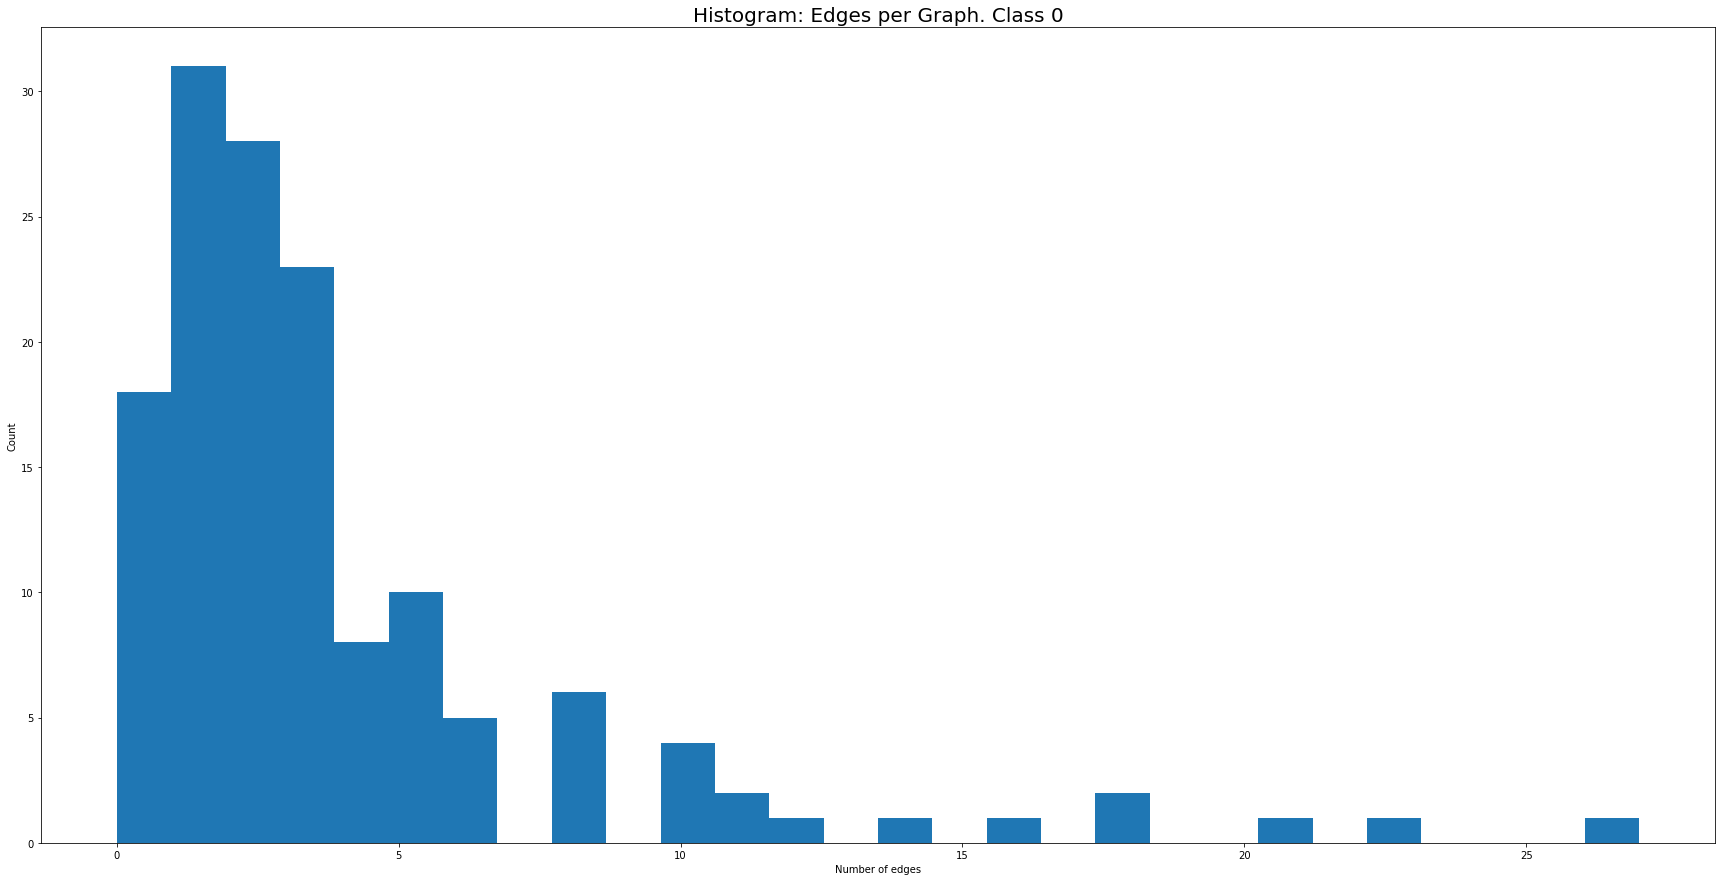

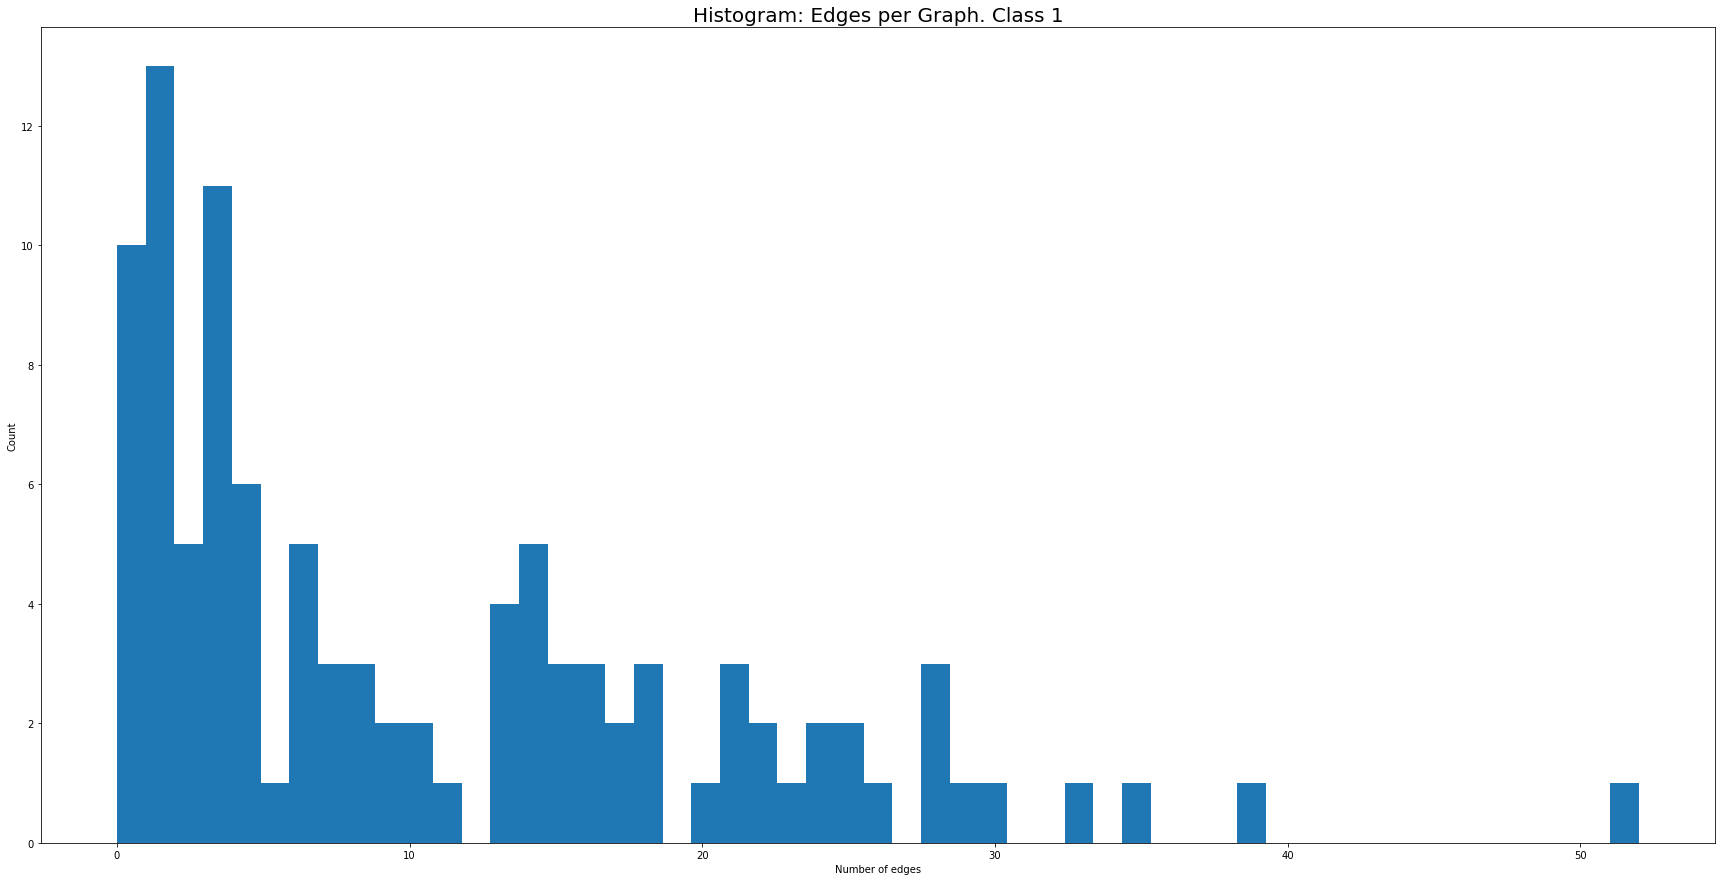

In [5]:
#3)Histogram
#============================================================================================================================================================================

def edges_histogram(graphs, label):
    total_edges, edges_dict = [], {}
    for i in range(len(graphs)):
        edges = [e for e in graphs[i].edges]
        edges_dict[str(i+1)] = len(edges)
        
    keys = edges_dict.keys()
    values = edges_dict.values()
    plt.figure(figsize=(30,15))
    plt.title('Histogram: Edges per Graph. Class ' + str(label), fontsize=20)
    plt.hist(values, bins=max(values)+1-min(values))
    plt.xlabel('Number of edges')
    plt.ylabel('Count')
    #plt.bar(keys, values, align='center')
    plt.show()

    
for j in range(2):
    edges_histogram(graphs[j], j)
        

## Discusión del histograma y si es necesario cambiar el threshold

Como podemos observar, con el threshold actual tenemos para ambas clases muchos grafos con un número pequeño de aristas, siendo la mayoría de los grafos de tamaño 5 o inferior. Eso significa que no podemos extraer conclusiones de como se relacionan las neuronas del cerebro antes y después de un ataque epiléptico, pues solo tenemos información de las conexiones de muy pocas neuronas de todas las posibles. El threshold inicial es muy alto (0.9 sobre 1) por lo que deberíamos disminuirlo para poder observar más conexiones entre más neuronas, ya que disminuir el threshold hará que se tengan también en cuenta conexiones entre neuronas con un valor inferior, aumentando pues el número de conexiones consideradas.

Tras hacer algunas pruebas he concluido que el threshold óptimo es **0.3**.

# 2. Después de modificar el threshold a 0.3

In [6]:
#1) Read EEG files and transform into NetworkX graphs with EEGRAPH
#============================================================================================================================================================================

def search(values, searchFor):
    for k in values:
        if (searchFor == k):
            return (values[k])

    
def search_key(values, searchFor):
    for key, value in values.items():
        if value[0] == searchFor:
            return key
          
    
def test_empty(graphs, conn_empty_values, conn):
    conn_empty_aux = [0] * len(conn_empty_values)
    for i in range(len(graphs)):
        if(nx.is_empty(graphs[i])):
            conn_empty_aux[conn] += 1
    
    conn_empty_values[conn] = conn_empty_values[conn] + conn_empty_aux[conn]
    print('Empty:',conn_empty_values,'\n')
    return conn_empty_values   
    
    
def modelate_with_different_connectivity(window_size, label, connectivity_number_total, G, conn_empty_values):
    total_graphs_class_0, total_graphs_class_1  = [], []
    for i in range(connectivity_number_total):
        conn = search_key(connectivity_measures, i)
        bands = search(connectivity_measures, conn)[1]
        
        # The threshold can be omited to use the default one
        graphs, _ = G.modelate(window_size = window_size, connectivity = conn, bands = bands, threshold = 0.3)  

        conn_empty_values = test_empty(graphs, conn_empty_values, i)
        
        if(int(label)):
            total_graphs_class_1 = total_graphs_class_1 + list(graphs.values())    
        
        else:
            total_graphs_class_0 = total_graphs_class_0 + list(graphs.values())
            

    return total_graphs_class_0, total_graphs_class_1, conn_empty_values


def open_data_directories(path, window_size_class_0, window_size_class_1, connectivity_number_total, exclude=[None]):
    conn_empty_values = [0] * connectivity_number_total
    graphs_class_0, graphs_class_1 = [], []
    class_files = os.listdir(path)
    for entry in class_files:
        eeg_files = os.listdir(path + '/' + entry)
        for eeg in eeg_files:
            eeg_path = (path + '/' + entry + '/' + eeg)
            print(eeg_path, entry)
            G = eegraph.Graph() 
            G.load_data(path= eeg_path, exclude = exclude)
            
            if(entry == '1'):     # Number 1 corresponds to "espasmo" data
                window_size = window_size_class_1
            elif (entry == '0'):  # Number 0 corresponds to "presalva" data
                window_size = window_size_class_0
            
            print('\n=========================================')
            final_graphs_class_0, final_graphs_class_1 , conn_empty_values = modelate_with_different_connectivity(window_size=window_size,
                                                                                                                label=entry,
                                                                                                                connectivity_number_total=con_number_total, 
                                                                                                                G=G, 
                                                                                                                conn_empty_values=conn_empty_values)
            
            graphs_class_0 = graphs_class_0 + final_graphs_class_0
            graphs_class_1 = graphs_class_1 + final_graphs_class_1
        
    return graphs_class_0, graphs_class_1


"""   
connectivity_measures = {'cross_correlation': (0, [None]), 'pearson_correlation': (1, [None]), 'squared_coherence': (2, ['delta', 'theta', 'alpha', 'beta']),
                         'imag_coherence': (3, ['delta', 'theta', 'alpha', 'beta']), 'corr_cross_correlation': (4, [None]), 'wpli': (5, ['delta', 'theta', 'alpha', 'beta']), 
                         'plv': (6, ['delta', 'theta', 'alpha', 'beta']), 'pli': (7, [None]),
                         'power_spectrum': (8, ['delta', 'theta', 'alpha', 'beta']), 'spectral_entropy': (9, ['delta', 'theta', 'alpha', 'beta']), 
                         'shannon_entropy': (10, [None])}     

"""
 
connectivity_measures = {'pearson_correlation': (0, [None])}   #CONNECTIVITY MEASURES USED


path = 'data'                                                         #<--------------- PATH TO FOLDER CONTAINING EEGs
window_size_class_0 = 1                                               #<--------------- CLASS 0 WINDOW SIZE
window_size_class_1 = 1                                               #<--------------- CLASS 1 WINDOW SIZE
con_number_total = 1                                                  #<--------------- NUMBER OF CONNECTIVITY MEASURES USED, MUST BE THE SAME AS LENGTH OF DICTIONARY 'connectivity_measures'
graphs_class_0, graphs_class_1 = open_data_directories(path, window_size_class_0, window_size_class_1, con_number_total) 
graphs = [graphs_class_0, graphs_class_1]








        









data/0/1_presalva_1.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_presalva_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 10.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1536.0), (1536.0, 2048.0), (2048.0, 2560.0), (2560.0, 3072.0), (3072.0, 3584.0), (3584.0, 4096.0), (4096.0, 4608.0), (4608.0, 5120.0), (5120.0, 5631.0)]

Threshold: 0.3
Number of graphs created: 11
Empty: [0] 

data/0/1_presalva_10.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_presalva_10.edf...
EDF file detected
Setting channel info struc


Threshold: 0.3
Number of graphs created: 11
Empty: [0] 

data/0/1_presalva_7.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_presalva_7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 10.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1536.0), (1536.0, 2048.0), (2048.0, 2560.0), (2560.0, 3072.0), (3072.0, 3584.0), (3584.0, 4096.0), (4096.0, 4608.0), (4608.0, 5120.0), (5120.0, 5631.0)]

Threshold: 0.3
Number of graphs created: 11
Empty: [0] 

data/0/1_presalva_8.edf 0
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\0\1_presal

Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 3.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1536.0), (1536.0, 2047.0)]

Threshold: 0.3
Number of graphs created: 4
Empty: [0] 

data/1/1_espasmo_17.edf 1
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\1\1_espasmo_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 4.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG 

EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 2.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3', 'EEG T6', 'EEG T5', 'EEG Pz', 'EEG Fz', 'EEG Cz']

Model Data.
Pearson_correlation_Estimator()
Intervals:  [(0, 512.0), (512.0, 1024.0), (1024.0, 1535.0)]

Threshold: 0.3
Number of graphs created: 3
Empty: [0] 

data/1/1_espasmo_6.edf 1
Extracting EDF parameters from C:\Users\Miguel\IdeaProjects\seminario-datmining\data\1\1_espasmo_6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...

EEG Information.
Number of Channels: 19
Sample rate: 512.0 Hz.
Duration: 3.998 seconds.
Channel Names: ['EEG Fp1', 'EEG Fp2', 'EEG F4', 'EEG F3', 'EEG C3', 'EEG C4', 'EEG P4', 'EEG P3', 'EEG O2', 'EEG O1', 'EEG F8', 'EEG F7', 'EEG T4', 'EEG T3

## Representación visual de un grafo de cada clase


In [7]:
#2) Visualize graphs
#============================================================================================================================================================================

def visualize_graphs(graphs, selected):
    G = eegraph.Graph() 
    for i in range(selected[0], selected[1]+1):
        G.visualize(graphs[i])
    
    
wanted = [0, 1]   # Graph position  
visualize_graphs(graphs_class_0, wanted)
wanted = [0, 1]   # Graph position  
visualize_graphs(graphs_class_1, wanted)

## Número de grafos generados

print('Número de grafos generados para la clase 0: ', len(graphs_class_0))
print('Número de grafos generados para la clase 1: ', len(graphs_class_1))


Número de grafos generados para la clase 0:  143
Número de grafos generados para la clase 1:  103


## Nuevos histogramas y discutir si la información obtenida es adecuada para el análisis


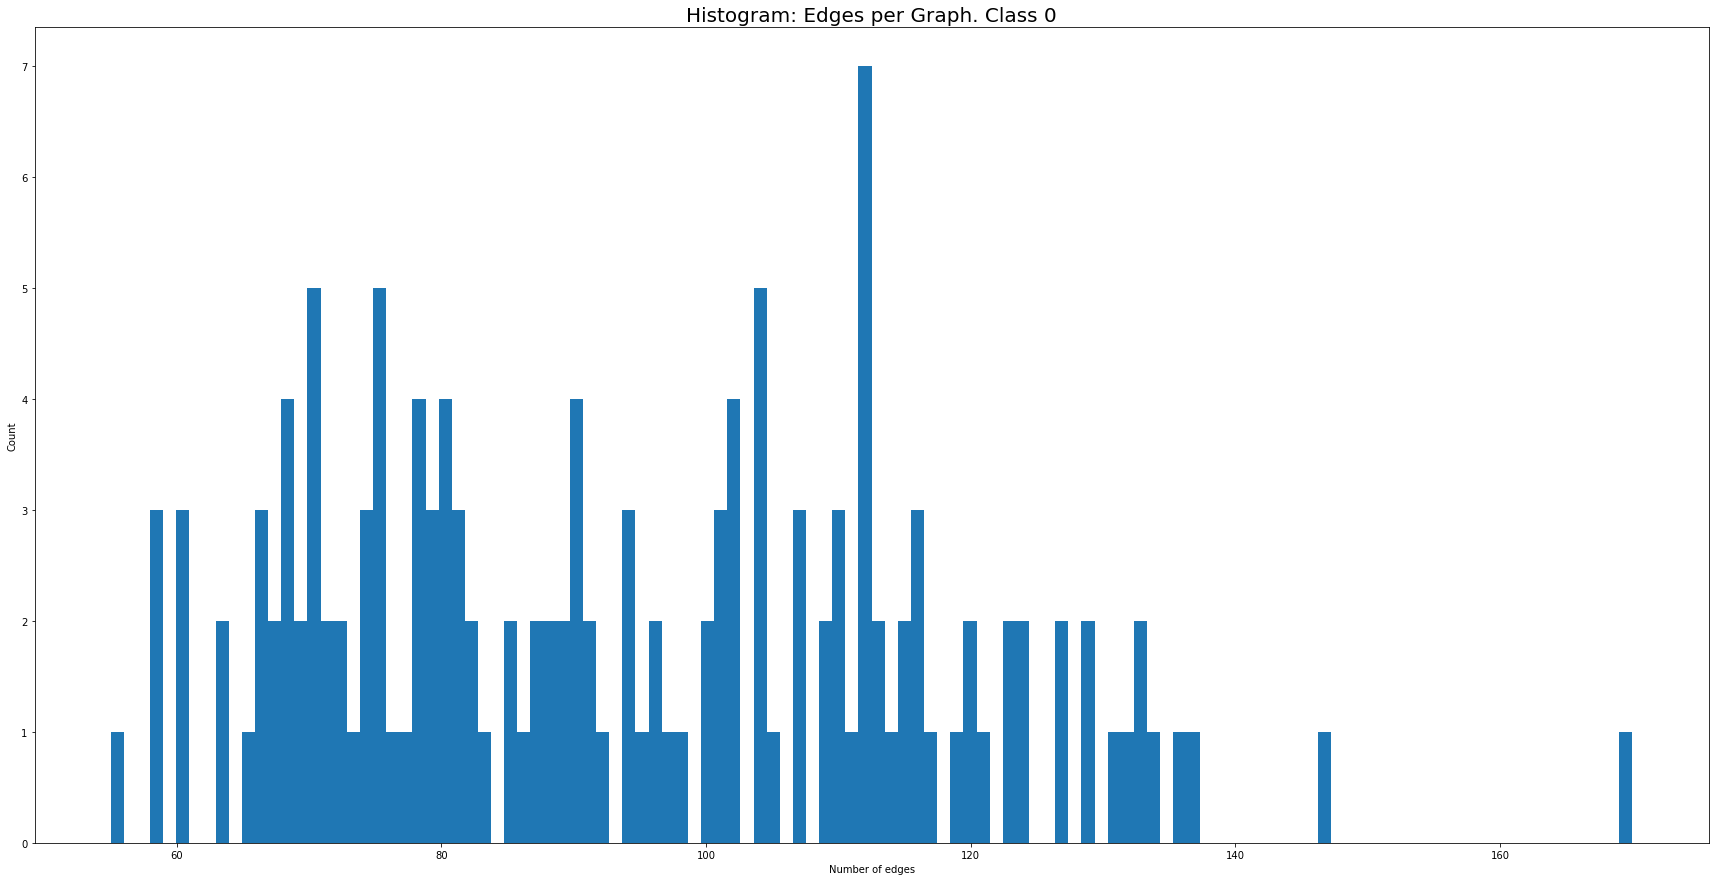

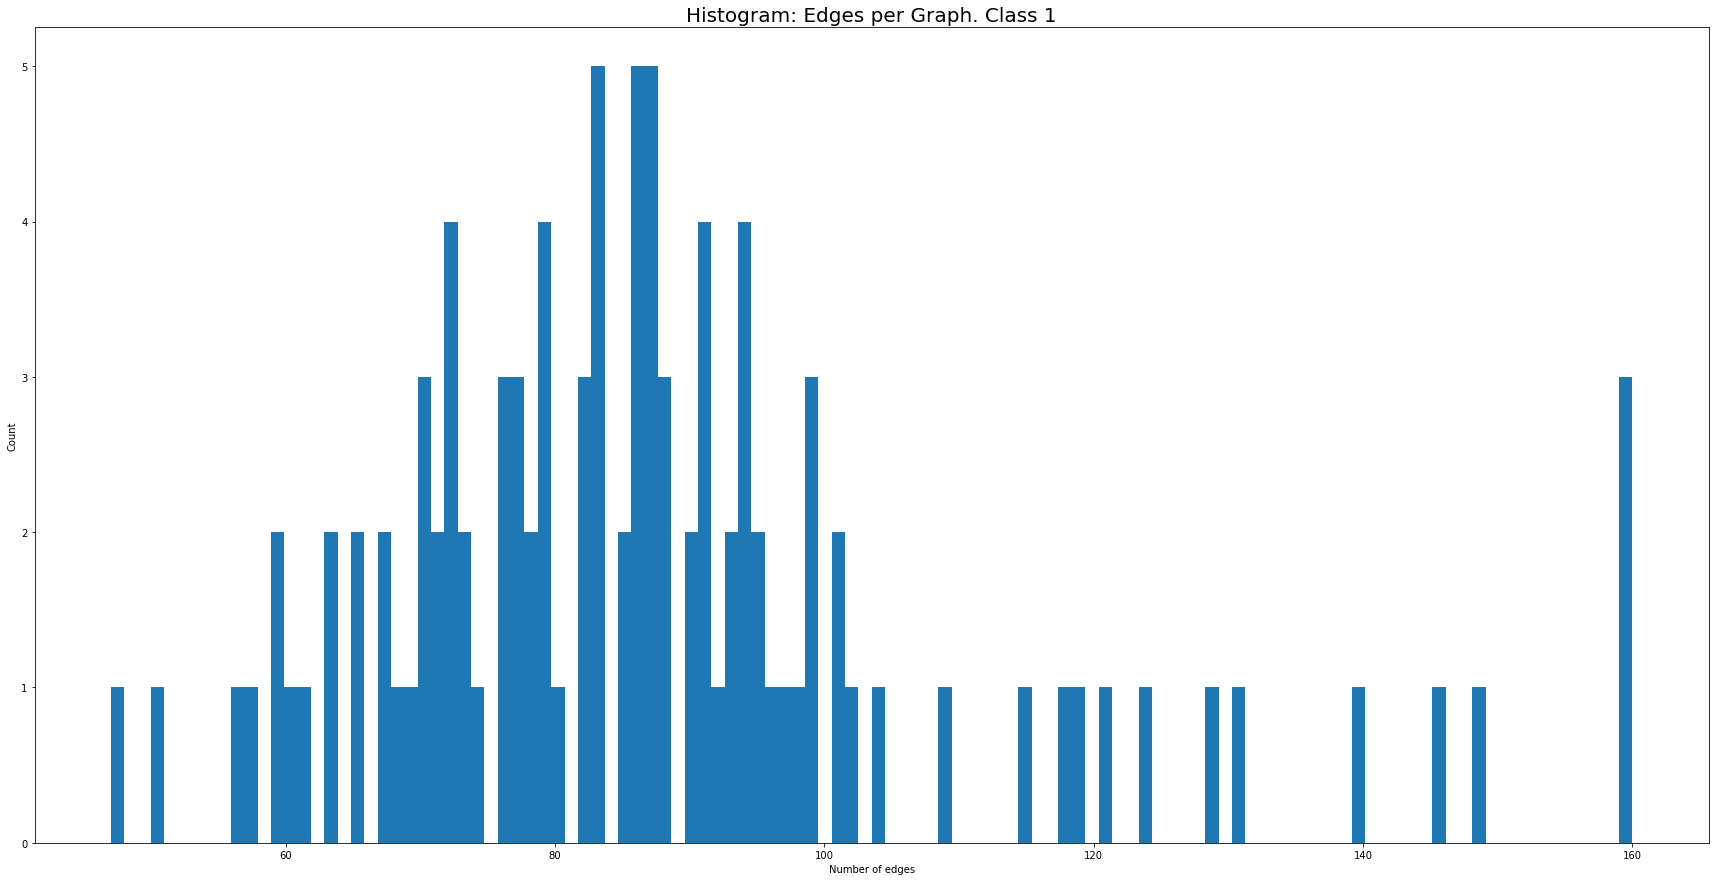

In [8]:
#3)Histogram
#============================================================================================================================================================================

def edges_histogram(graphs, label):
    total_edges, edges_dict = [], {}
    for i in range(len(graphs)):
        edges = [e for e in graphs[i].edges]
        edges_dict[str(i+1)] = len(edges)
        
    keys = edges_dict.keys()
    values = edges_dict.values()
    plt.figure(figsize=(30,15))
    plt.title('Histogram: Edges per Graph. Class ' + str(label), fontsize=20)
    plt.hist(values, bins=max(values)+1-min(values))
    plt.xlabel('Number of edges')
    plt.ylabel('Count')
    #plt.bar(keys, values, align='center')
    plt.show()

    
for j in range(2):
    edges_histogram(graphs[j], j) 

Aquí podemos observar que la mayoría de los grafos tienen, para ambas clases, un número de conexiones próximos a la media y muy pocos tiene un número cercano a 0 o que se exceden demasiado. Esto es adecuado para el análisis de los datos, pues así tenemos mucha información (muchos grafos) sobre como se relacionan las neuronas del cerebro antes y después de un ataque epiléptico, sin que esa información sea sobre muy pocas neuronas (no hay suficientes conexiones como para extraer conclusiones) o demasiadas (no queda claro cuáles son las conexiones importantes).

## Indicar número de grafos "nulos"

In [9]:
#4)Empty graphs
#============================================================================================================================================================================

def empty_graphs(graphs):
    empty_graphs, empty_dict = 0, {}
    for i in range(len(graphs)):
        if(nx.is_empty(graphs[i])):
            empty_dict[i] = True
            empty_graphs += 1
        else:
            empty_dict[i] = False
    
    return empty_graphs, empty_dict
    
empty_amount, graphs_dict = [None]*2, [None]*2
for j in range(2):
    empty_amount[j], graphs_dict[j] = empty_graphs(graphs[j])
    print('\nNúmero de grafos nulos para la clase ' + str(j) + ': ' , empty_amount[j])
    
    



Número de grafos nulos para la clase 0:  0

Número de grafos nulos para la clase 1:  0


In [10]:
#5)Erase Empty Graphs
#============================================================================================================================================================================

def delete_graphs(graphs, graphs_dict):
    for key,value in reversed(graphs_dict.items()):
        if(value):
            print('Deleting graph in index:', str(key))
            del graphs[key]
    return graphs


print('\n=====================================================================') 
print('Deleting empty graphs.')
for j in range(2):
    if (empty_amount[j]):
        print('\nGraphs in Class', j, ':')
        graphs[j] = delete_graphs(graphs[j], graphs_dict[j])

        
print('\nTotal graphs for class 0: ', len(graphs[0]))
print('Total graphs for class 1: ', len(graphs[1]))
    
    


Deleting empty graphs.

Total graphs for class 0:  143
Total graphs for class 1:  103


## Valor medio y std de la medida de conectividad y discusión del resultado  

In [11]:
#6)Mean value and Standard Deviation for graphs
#============================================================================================================================================================================
def mean_std(graphs):
    edges_weights, edges_dict = [], {}
    for i in range(len(graphs)):
        edges = [d.get('weight') for e1,e2,d in graphs[i].edges(data=True)]
        edges_weights = edges_weights + edges

    print('Mean:', round(np.mean(edges_weights),5))
    print('STD:', round(np.std(edges_weights),5))
    
    
print('Media de los valores de los ejes y Desviación Estándar del número de conexiones de los grafos:')
print('Mean values and Standar Deviation for edges in the graphs.')
for j in range(2):
    print('\nClass', j, ':')
    mean_std(graphs[j])

Media de los valores de los ejes y Desviación Estándar del número de conexiones de los grafos:
Mean values and Standar Deviation for edges in the graphs.

Class 0 :
Mean: 0.59912
STD: 0.17424

Class 1 :
Mean: 0.64877
STD: 0.19507


Como podemos ver la media de los pesos de las conexiones para cada clase es cercana a 0.6 (sobre 1), por lo que la mayoría de las conexiones que hemos detectado tienen un peso significativo. Así mismo la desviación estándar de los pesos es próxima a 0, por lo que la mayoría de los grafos tiene un número de conexiones con pesos cercanos a la media. Esto nos indica que, con este nuevo threshold, hemos generado unos grafos dónde la mayoría de las conexiones tiene pesos adecuados. Si añadimos la información que nos aportan los histogramas, significa que hemos generado un número de grafos adecuados para saber cómo se relacionan las neuronas del cerebro antes y después de un ataque epiléptico, y a su vez esos grafos tienen conexiones con pesos significativos. Por lo tanto hemos generado un modelo óptimo.